In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/survey.csv')

In [3]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


1. **Medidas de tendencias central y de Posición**. Elija una **variable
cuantitativa discreta**, para ello, cada estudiante deberá calcular las
medidas de tendencia central (media, mediana, moda), medidas de
posición: cuartiles, percentil 25, 50 y 75, determinar el tipo de
asimetría y curtosis, interpretar los resultados, sacar conclusiones
de los parámetros hallados y asociales con la problemática:
Seguimiento piezas imperfectas y menor consumo de
recursos.

In [4]:
# La variable cuantitativa discreta que elegí fue "Age"
variable = df['Age']

In [5]:
media = variable.mean()
mediana = variable.median()
moda = variable.mode()[0]

In [6]:
cuartiles = variable.quantile([0.25, 0.50, 0.75])
percentiles_25 = variable.quantile(0.25)
percentiles_50 = variable.quantile(0.50)
percentiles_75 = variable.quantile(0.75)

In [7]:
asimetria = variable.skew()
curtosis = variable.kurtosis()

In [ ]:
resultados = {
    "Media": media,
    "Mediana": mediana,
    "Moda": moda,
    "Cuartiles": cuartiles,
    "Asimetría": asimetria,
    "Curtosis": curtosis
}

In [ ]:
resultados

{'Media': 79428148.31135821,
 'Mediana': 31.0,
 'Moda': 29,
 'Cuartiles': 0.25    27.0
 0.50    31.0
 0.75    36.0
 Name: Age, dtype: float64,
 'Asimetría': 35.482389998420345,
 'Curtosis': 1258.9999999999989}

**INTERPRETACIÓN DE LOS RESULTADOS**

**Media: 79,428,148.31**
Este valor es muy elevado y no esta reflejando adecuadamente la edad de los encuestados, ya que podría haber datos anómalos (outliers) o errores en los registros.

**Mediana: 31.0**
La mediana, que es 31, indica que la mitad de los encuestados tiene 31 años o menos. Esto es menos sensible a los valores extremos y proporciona una mejor representación de la edad central en el dataset en comparación con la media.

**Moda: 29**
La moda es el valor más frecuente, que es 29. Esto sugiere que muchos encuestados tienen esta edad, lo que puede ser un indicador de la tendencia general en el grupo.

**Cuartiles:**

Percentil 25 (Q1): 27.0

El 25% de los encuestados tiene 27 años o menos. Esto indica que una porción significativa de la población encuestada es relativamente joven.

Percentil 50 (Q2): 31.0

Ya mencionado como la mediana, reafirma que la edad media de la población está alrededor de los 31 años.

Percentil 75 (Q3): 36.0

El 75% de los encuestados tiene 36 años o menos, lo que indica que la mayoría está dentro de un rango relativamente joven.

Asimetría: 35.48

 La alta asimetría indica que, aunque el promedio de edad parece ser alto, en realidad, la mayoría de las personas en la encuesta son más jóvenes. Esto puede dar una idea equivocada sobre la edad promedio de los encuestados, ya que unas pocas edades muy altas están alterando la cifra.

Curtosis: 1259.00

La curtosis es significativamente alta (1259), lo que indica que la distribución tiene un pico muy alto y colas gruesas. Esto sugiere que hay una gran cantidad de valores extremos, lo que puede ser un indicativo de que existen varios encuestados con edades anómalas o que hay errores en los datos de edad.

**Relación con la Problemática**

Si la mayoría de los trabajadores son jóvenes: Esto sugiere que podrían ser más propensos a experimentar problemas de salud mental debido a factores como el estrés y la presión en sus trabajos. En la industria tecnológica, donde las demandas pueden ser altas, es importante prestar atención a la salud mental de esta población joven.



2. Medidas de Dispersión. Para la variable cuantitativa discreta elegida calcular: Rango, varianza, desviación típica o estándar, coeficiente de variación, posteriormente interpretar los resultados, sacar conclusiones de los parámetros hallados y asociarlos con la problemática: Seguimiento piezas imperfectas y menor
consumo de recursos.

In [8]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar el dataframe para eliminar outliers
df_limpio = df[(df['Age'] >= limite_inferior) & (df['Age'] <= limite_superior)]

# Revisar el nuevo DataFrame
print(df_limpio['Age'].describe())

count    1219.000000
mean       31.468417
std         6.276310
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        49.000000
Name: Age, dtype: float64


Al tener varios valores anormales en el apartado de edad que dañaban completamente los resultados, se decidio eliminar las filas de dichos outlier, pasando de haber 1259 datos a 1219 datos.

In [ ]:
df_limpio

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
variable_Actualizada = df_limpio['Age']

In [ ]:
rango = variable_Actualizada.max() - variable_Actualizada.min()
varianza = variable_Actualizada.var()
desviacion_estandar = variable_Actualizada.std()
coeficiente_variacion = (desviacion_estandar / variable_Actualizada.mean()) * 100

In [ ]:
resultados_dispersion = {
    "Rango": rango,
    "Varianza": varianza,
    "Desviación Estándar": desviacion_estandar,
    "Coeficiente de Variación": coeficiente_variacion
    }

In [ ]:
resultados_dispersion

{'Rango': 31,
 'Varianza': 39.392064075778805,
 'Desviación Estándar': 6.276309749827426,
 'Coeficiente de Variación': 19.944790367673704}

**Impacto en la Salud Mental:**

Con un rango moderado de edades y una desviación estándar razonable, podemos concluir que los encuestados son relativamente homogéneos en términos de edad. Esto es positivo para analizar cómo la salud mental puede verse afectada en este grupo de trabajadores de tecnología, ya que no parece haber una gran dispersión que complique las conclusiones.
Las políticas y estrategias de salud mental en el lugar de trabajo pueden estar dirigidas a un grupo de personas con edades cercanas, lo que facilita la implementación de programas de apoyo que sean aplicables a la mayoría de los empleados.

**Relación con el Seguimiento de Piezas Imperfectas y Menor Consumo de Recursos:**

El bajo coeficiente de variación y la desviación estándar indican que los datos de edad ahora son mucho más manejables y no hay grandes discrepancias. Esto es importante al considerar la eficiencia en el seguimiento de piezas imperfectas y el consumo de recursos, ya que una población con características más homogéneas puede facilitar el enfoque en soluciones más estandarizadas para la salud mental y la productividad.
El hecho de que las edades no estén muy dispersas ayuda a diseñar políticas empresariales más eficientes, ya que los empleados probablemente tengan necesidades similares en términos de apoyo mental y condiciones laborales.

4. A partir de la base de datos elegida para esta Fase, el estudiante
deberá elegir una variable cuantitativa continua, deberá manifestarla
en el foro de discusión y resolver los incisos a, b y c.

In [ ]:
# Convertir la columna de timestamp a datetime
df_limpio.loc[:, 'Timestamp'] = pd.to_datetime(df_limpio['Timestamp'])

# Extraer horas, minutos y segundos
df_limpio.loc[:, 'Horas'] = df_limpio['Timestamp'].dt.hour + df_limpio['Timestamp'].dt.minute / 60 + df_limpio['Timestamp'].dt.second / 3600

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_limpio

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
bins = np.arange(0, 24, 1)  # Desde 0 hasta 24 horas, en intervalos de 1 hora
df_limpio.loc[:, 'Rango'] = pd.cut(df_limpio.loc[:, 'Horas'], bins=bins)

frecuencia = df_limpio.loc[:, 'Rango'].value_counts().sort_index() # Contar la frecuencia en cada intervalo
print(frecuencia)


KeyError: 'Horas'

In [ ]:
# HISTOGRAMA DE FRECUENCIA
plt.figure(figsize=(10, 5))
plt.hist(df_limpio['Horas'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias')
plt.xlabel('Horas (decimal)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# POLIGONO DE FRECUENCIA
plt.figure(figsize=(10, 5))
plt.plot(frecuencia.index.astype(str), frecuencia.values, marker='o', color='blue')
plt.title('Polígono de Frecuencias')
plt.xlabel('Rango de Horas (decimal)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


KeyError: 'Horas'

<Figure size 1000x500 with 0 Axes>

**Horas pico:**

Las horas más frecuentes (intervalos con mayor cantidad de observaciones) están entre las 12 y las 14 horas, con un pico máximo en el intervalo de 12 a 13 horas (158 observaciones).

El intervalo de 11 a 12 horas también tiene una alta cantidad de observaciones (141).

**Dispersión de los datos:**

Existe una acumulación considerable de observaciones en el rango de 9 a 16 horas, con una frecuencia particularmente alta entre 11 y 15 horas. Esto podría reflejar que en ese periodo del día es cuando ocurren más eventos importantes (producción, fallos, etc.).
Antes de las 9 horas y después de las 16 horas, la frecuencia de observaciones disminuye drásticamente.

In [ ]:
df_limpio['Timestamp'].describe()

<ipython-input-24-b3231d8b34c3>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_limpio['Timestamp'].describe()


,Timestamp
count,1219
unique,1208
top,2014-08-27 12:43:28
freq,2


In [ ]:
df_limpio.loc[:, 'Timestamp'] = pd.to_datetime(df_limpio['Timestamp'], errors='coerce')

df_limpio.loc[:, 'Horas'] = df_limpio.loc[:, 'Timestamp'].dt.hour
df_limpio.loc[:, 'Minutos'] = df_limpio.loc[:, 'Timestamp'].dt.minute
df_limpio.loc[:, 'Segundos'] = df_limpio.loc[:, 'Timestamp'].dt.second

df_limpio.loc[:, 'Horas_decimal'] = df_limpio.loc[:, 'Horas'] + df_limpio.loc[:, 'Minutos'] / 60 + df_limpio.loc[:, 'Segundos'] / 3600
print(df_limpio.loc[:, ['Timestamp', 'Horas_decimal']].head())

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_limpio.drop(columns=['Horas', 'Minutos', 'Segundos', 'Timestamp'], inplace=True)

df_limpio.rename(columns={'Horas_decimal': 'Timestamp'}, inplace=True)
print(df_limpio.head())

In [ ]:
df_limpio['Timestamp'].describe()

In [ ]:
media = df_limpio['Timestamp'].skew()
curt = df_limpio['Timestamp'].kurt()
print("La medida de asimetria es: ", media)
print("La curtosis es: ", curt)

In [ ]:
df_limpio['Timestamp']

In [ ]:
variable_Actualizada2 = df_limpio['Timestamp']

In [ ]:
rango2 = variable_Actualizada2.max() - variable_Actualizada2.min()
varianza2 = variable_Actualizada2.var()
desviacion_estandar2 = variable_Actualizada2.std()
coeficiente_variacion2 = (desviacion_estandar2 / variable_Actualizada2.mean()) * 100

In [ ]:
resultados_dispersion2 = {
    "Rango": rango2,
    "Varianza": varianza2,
    "Desviación Estándar": desviacion_estandar2,
    "Coeficiente de Variación": coeficiente_variacion2
    }

In [ ]:
resultados_dispersion2

**Rango: 23.96**

Un rango de 23.96 horas significa que los datos abarcan casi todo el día (24 horas). Esto implica que las observaciones están distribuidas a lo largo de casi todas las horas del día.

**Varianza: 20.73:**

Una varianza de 20.73 es considerablemente alta, lo que indica que los datos no están muy concentrados alrededor de la media, sino que están bastante dispersos en diferentes horas del día.

**Desviación Estándar: 4.55:**

Una desviación estándar de 4.55 horas significa que, en promedio, los valores se desvían de la media en aproximadamente 4.55 horas. Esto también refuerza la idea de que hay una dispersión considerable en los datos.

**Coeficiente de Variación: 34.12%:**

Un coeficiente de variación del 34.12% es moderadamente alto, lo que indica que los datos son bastante variables en comparación con la media. Es decir, hay una gran variabilidad en las horas en las que se realizaron las mediciones o se recogieron los datos.



**Variabilidad en el tiempo:** La alta variabilidad (varianza y desviación estándar) sugiere que los eventos (mediciones o fallas de piezas) no ocurren en un momento específico del día, sino que se distribuyen a lo largo de diferentes horas. Este comportamiento puede dificultar el control de calidad y el seguimiento de piezas imperfectas, ya que no hay un patrón de tiempo claro.

**Optimización de recursos:** El hecho de que los datos estén distribuidos de manera dispersa durante todo el día (como muestra el rango cercano a 24 horas y la alta desviación estándar) puede indicar que no se están utilizando los recursos de manera óptima. Si las observaciones se concentran más en ciertas horas, se podrían ajustar los recursos (personal, maquinaria, etc.) para mejorar la eficiencia durante esos periodos específicos.

---

## Conlusión

En este análisis, hemos explorado varios aspectos clave relacionados con la distribución de los datos a lo largo del tiempo, utilizando la variable "Timestamp" convertida a horas decimales. Al aplicar herramientas estadísticas como el histograma y el polígono de frecuencias, logramos identificar momentos clave del día en los que se concentra la mayor cantidad de eventos relevantes, lo que nos ayudó a detectar las horas más críticas en términos de fallos o piezas imperfectas. Además, al calcular medidas de dispersión como el rango, la varianza y la desviación estándar, obtuvimos una comprensión más clara sobre la variabilidad de los procesos, lo que nos permitió visualizar mejor su comportamiento.

Por otro lado, incorporar la variable "Age" como variable cuantitativa discreta nos permitió añadir un enfoque demográfico, que puede estar relacionado con factores como el rendimiento de los empleados y el consumo de recursos. Este análisis no solo aporta datos útiles para mejorar la gestión del tiempo y los recursos en la producción, sino que también abre la puerta a optimizar la calidad del producto final. En definitiva, este enfoque nos permite implementar mejoras basadas en datos reales, favoreciendo la eficiencia operativa y contribuyendo a un uso más inteligente de los recursos.

---

-------------------------------------------------

# **Introducción**

En la actualidad, la salud mental en el entorno laboral se ha convertido en un tema de creciente preocupación, ya que afecta no solo el bienestar de los empleados, sino también la productividad y eficiencia de las organizaciones. Diversos estudios han demostrado que los problemas de salud mental pueden interferir significativamente en el desempeño laboral, lo que resulta en un aumento de ausencias, disminución de la satisfacción en el trabajo y un impacto negativo en la cultura organizacional. Este proyecto se centra en analizar la relación entre diferentes variables categóricas y la variable objetivo "treatment", que representa el acceso a tratamientos de salud mental. A través del uso de herramientas estadísticas, se busca identificar patrones y correlaciones que puedan proporcionar información valiosa para la mejora de políticas y programas de bienestar en el trabajo.

---

# **Justificación**

La salud mental es un componente crucial del bienestar general de los empleados y su impacto en el rendimiento organizacional no puede ser ignorado. Este proyecto no solo busca comprender mejor las dinámicas entre la salud mental y el trabajo, sino también proporcionar información práctica que pueda ser utilizada por las empresas para implementar medidas efectivas. Identificar variables significativas que afectan el acceso a tratamientos de salud mental permitirá a las organizaciones diseñar estrategias más eficaces, reduciendo el estigma asociado a estas problemáticas y promoviendo un ambiente laboral más saludable y productivo.

---

In [ ]:
df_limpio.columns.tolist()

En esta parte le aplicare el Value_counts a todas la variables para poder analizar las variables categoricas y numericas.

In [ ]:
resultados_value_counts = {}

for col in df_limpio.columns:
    resultados_value_counts[col] = df_limpio[col].value_counts()

for col, counts in resultados_value_counts.items():
    print(f"Valores únicos y frecuencias para '{col}':")
    print(counts)
    print("\n")

Valores únicos y frecuencias para 'Timestamp':
Timestamp
2014-08-27 12:43:28    2
2014-08-28 09:59:39    2
2014-08-27 12:37:50    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
                      ..
2014-08-27 15:32:43    1
2014-08-27 15:32:19    1
2014-08-27 15:32:09    1
2014-08-27 15:31:38    1
2016-02-01 23:04:31    1
Name: count, Length: 1208, dtype: int64


Valores únicos y frecuencias para 'Age':
Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
48     6
20     6
49     4
47     2
Name: count, dtype: int64


Valores únicos y frecuencias para 'Gender':
Gender
Male                                              598
male                                              199
Female                                            120
M                                                 10

<ipython-input-26-29fa1b11cd5d>:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  resultados_value_counts[col] = df_limpio[col].value_counts()


En este apartado se limpiara un poco la columna Gender, mas especificamente con Male y female, debido a que algunas respuestas las habian hecho como: m, M, male, etc. Entonces convertire todas esas respuestas en una sola que es Male y de esa misma manera hare con female.

In [ ]:
df_limpio.loc[:, 'Gender']=df_limpio['Gender'].replace({"Female	":"female", 'F': 'female', 'Female': 'female', "f":"female", "Female (cis)":"female", "Cis Female": "female","femail":"female","woman":"female", "cis-female/femme":"female", "Femake":"female"})
df_limpio.loc[:, 'Gender']=df_limpio['Gender'].replace({'male': 'Male', 'm': 'Male', "M":"Male", "Male (CIS)": "Male", "Woman": "female", "Cis Male": "Male", "Man": "Male", "Make": "Male", "Cis Man": "Male", "cis male":"Male", "Malr":"Male", "Mail":"Male", "msle":"Male", "maile":"Male", "Mal":"Male", "ostensibly male, unsure what that really means":"Male"})

In [ ]:
counts = df_limpio['Gender'].value_counts(dropna=True)
counts

,count
Gender,
Male,954
female,243
Female (trans),2
Female,2
Male,2
queer/she/they,1
non-binary,1
Nah,1
Enby,1


In [ ]:
resultados_value_counts = {}

for col in df_limpio.columns:
    resultados_value_counts[col] = df_limpio[col].value_counts()

for col, counts in resultados_value_counts.items():
    print(f"Valores únicos y frecuencias para '{col}':")
    print(counts)
    print("\n")

Valores únicos y frecuencias para 'Timestamp':
Timestamp
2014-08-27 12:43:28    2
2014-08-28 09:59:39    2
2014-08-27 12:37:50    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
                      ..
2014-08-27 15:32:43    1
2014-08-27 15:32:19    1
2014-08-27 15:32:09    1
2014-08-27 15:31:38    1
2016-02-01 23:04:31    1
Name: count, Length: 1208, dtype: int64


Valores únicos y frecuencias para 'Age':
Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
48     6
20     6
49     4
47     2
Name: count, dtype: int64


Valores únicos y frecuencias para 'Gender':
Gender
Male                        954
female                      243
Female (trans)                2
Female                        2
Male                          2
queer/she/they                1
non-binary            

<ipython-input-30-29fa1b11cd5d>:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  resultados_value_counts[col] = df_limpio[col].value_counts()


In [ ]:
resultados2_describe = {}

for col in df_limpio.columns:
    resultados2_describe[col] = df_limpio[col].describe()

for col, counts in resultados2_describe.items():
    print(f"Valores únicos y frecuencias para '{col}':")
    print(counts)
    print("\n")

Valores únicos y frecuencias para 'Timestamp':
count                    1219
unique                   1208
top       2014-08-27 12:43:28
freq                        2
Name: Timestamp, dtype: object


Valores únicos y frecuencias para 'Age':
count    1219.000000
mean       31.468417
std         6.276310
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        49.000000
Name: Age, dtype: float64


Valores únicos y frecuencias para 'Gender':
count     1219
unique      21
top       Male
freq       954
Name: Gender, dtype: object


Valores únicos y frecuencias para 'Country':
count              1219
unique               46
top       United States
freq                721
Name: Country, dtype: object


Valores únicos y frecuencias para 'state':
count     715
unique     44
top        CA
freq      129
Name: state, dtype: object


Valores únicos y frecuencias para 'self_employed':
count     1201
unique       2
top         No
freq      1066
Name: self_employe

<ipython-input-31-6484762d0348>:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  resultados2_describe[col] = df_limpio[col].describe()


**Variable Objetivo**

Analizando todos los datos usando describe() y value_counts() se tomara la variable Treatment como variable objetiva, que significa:

**¿Se ha hecho un chequeo para alguna enfermedad mental?**
Donde sus respuestas solo son dos (si y no) y en base a dicha variable objetivo por medio de chi cuadrado se buscara cuales son las variables categorica que son dependientes a mi variable objetivo "treatment".


In [ ]:
treatment_counts = df_limpio['treatment'].value_counts(dropna=True)
treatment_counts

,count
treatment,
Yes,614
No,605


Se realizara las tablas de contingencia y la prueba de chi-cuadrado a las variables cualitativas:

In [ ]:
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df_limpio['family_history'], df_limpio['treatment'])
tabla_contingencia

treatment,No,Yes
family_history,,
No,479,259
Yes,126,355


In [ ]:
chi2, p, dof, expected= chi2_contingency(tabla_contingencia)

print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Chi-cuadrado: 173.00563161270736
Valor p: 1.6320721631225748e-39
Grados de libertad: 1


**Chi-Cuadrado**


Un valor de Chi-cuadrado alto indica una gran diferencia entre las frecuencias observadas y las frecuencias esperadas, lo que sugiere que hay una relación significativa entre las dos variables.

**Valor p**

El valor p es 1.6320721631225748e-39, que es extremadamente bajo (muy cercano a 0).
(Generalmente, si el valor p es menor que 0.05, se rechaza la hipótesis nula de que no hay relación entre las variables).

En este caso, como el valor p es mucho menor que 0.05, se puede rechazar la hipótesis nula, lo que significa que existe una relación estadísticamente significativa entre tener antecedentes familiares de problemas de salud mental y haber buscado tratamiento para la salud mental.




----
Al tener 23 columnas diferentes se aplicara de igual manera un ciclo for, para ahorrar espacios de codigo, de esta manera determinar cuales variables son dependientes a mi variable objetivo "treatment".

In [ ]:
categorical_columns = ['Gender', 'self_employed', 'family_history', 'work_interfere', 'remote_work',
                       'tech_company', 'benefits', 'care_options', 'wellness_program',
                       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                       'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview',
                       'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

for col in categorical_columns:
    tabla_contingencia = pd.crosstab(df[col], df['treatment'])

    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

    print(f"\nColumna: {col}")
    print(f"Chi-cuadrado: {chi2}")
    print(f"Valor p: {p}")
    print(f"Grados de libertad: {dof}")


Columna: Gender
Chi-cuadrado: 90.12770480158187
Valor p: 0.0002225390006650452
Grados de libertad: 48

Columna: self_employed
Chi-cuadrado: 0.40642521118858016
Valor p: 0.5237895263210478
Grados de libertad: 1

Columna: family_history
Chi-cuadrado: 178.26676666565783
Valor p: 1.1584182294491328e-40
Grados de libertad: 1

Columna: work_interfere
Chi-cuadrado: 294.8374301765459
Valor p: 1.3033541910292024e-63
Grados de libertad: 3

Columna: remote_work
Chi-cuadrado: 0.7996266696549379
Valor p: 0.3712050125960662
Grados de libertad: 1

Columna: tech_company
Chi-cuadrado: 1.092865454273842
Valor p: 0.2958371878494479
Grados de libertad: 1

Columna: benefits
Chi-cuadrado: 64.8385903480411
Valor p: 8.326816588490713e-15
Grados de libertad: 2

Columna: care_options
Chi-cuadrado: 94.75872677329306
Valor p: 2.6509645800176187e-21
Grados de libertad: 2

Columna: wellness_program
Chi-cuadrado: 11.497649893136375
Valor p: 0.003186522932181415
Grados de libertad: 2

Columna: seek_help
Chi-cuadrado

---
Ahora se hara exactamente lo mismo, pero con mi variable numerica:

Dada que la edad mas joven que realizo la encuesta es de 19 y la mayor edad es de 49, se dicretizaran los valores de la siguientes manera:

19 - 29 -> Adulto Joven

30 - 39 -> Adulto

40 - 49 -> Adulto Mayor

In [ ]:
bins = [19, 29, 39, 49]
labels = ['adulto joven', 'adulto', 'adulto mayor']


df['grupo_edad'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
frecuencia_grupo_edad = df['grupo_edad'].value_counts()

print(frecuencia_grupo_edad)

grupo_edad
adulto          554
adulto joven    500
adulto mayor    149
Name: count, dtype: int64


In [ ]:
tabla_contingencia = pd.crosstab(df['grupo_edad'], df['treatment'])
print(tabla_contingencia)

treatment      No  Yes
grupo_edad            
adulto joven  265  235
adulto        269  285
adulto mayor   62   87


In [ ]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Chi-cuadrado: 6.35667433317635
Valor p: 0.04165486266232051
Grados de libertad: 2


Al arrojar un valor menor a 0.05 podemos comprobar No es hipotesis nula, o sea que las variables que se estan analizando son dependientes.

---
Para determinar si las variables categóricas son dependientes de la variable objetivo (treatment), observamos el valor p resultante de la prueba de Chi-cuadrado:


Si el valor p es menor que 0.05, se concluye que hay suficiente evidencia para rechazar la hipótesis nula, lo que significa que la variable es dependiente de la variable objetivo.

Si el valor p es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula, lo que significa que la variable no es dependiente de la variable objetivo.

Las variables dependientes de la variable objetivo treatment son:
* Gender
* family_history
* work_interfere
* benefits
* care_options
* wellness_program
* seek_help
* anonymity
* leave
* mental_health_consequence
* coworkers
* mental_health_interview
* mental_vs_physical
* obs_consequence

Variable numerica:

* Age

El Primer paso es crear un Diagrama de enjambre para poder realizar un mayor analisis.

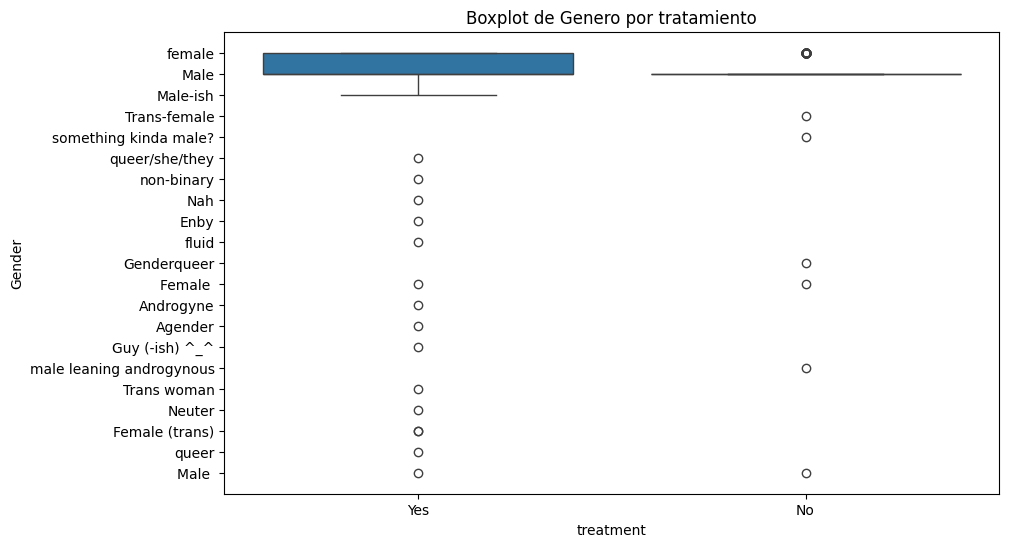

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="treatment", y="Gender", data=df_limpio, hue="treatment")
plt.title("Boxplot de Genero por tratamiento")
plt.show()

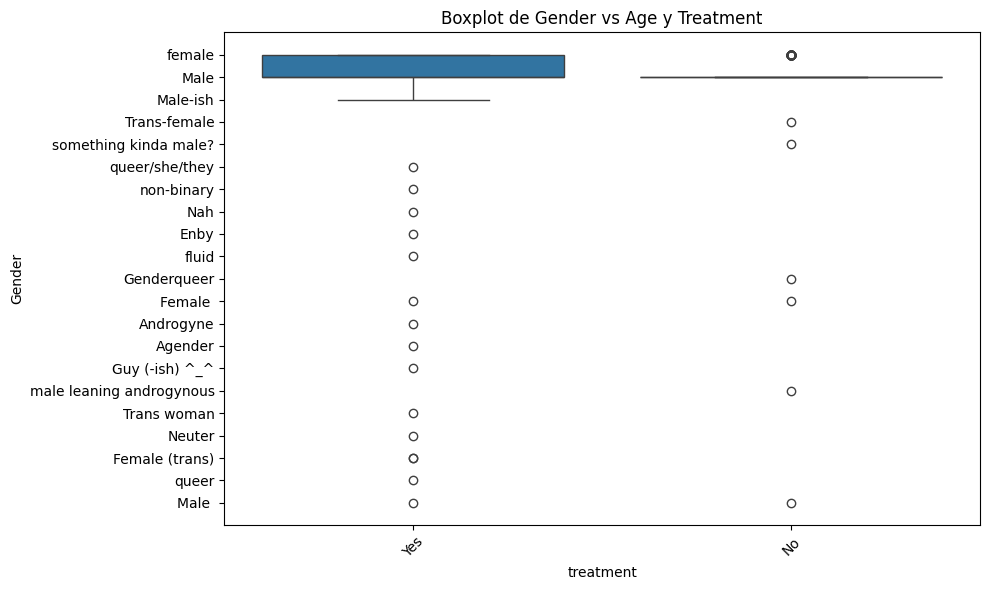

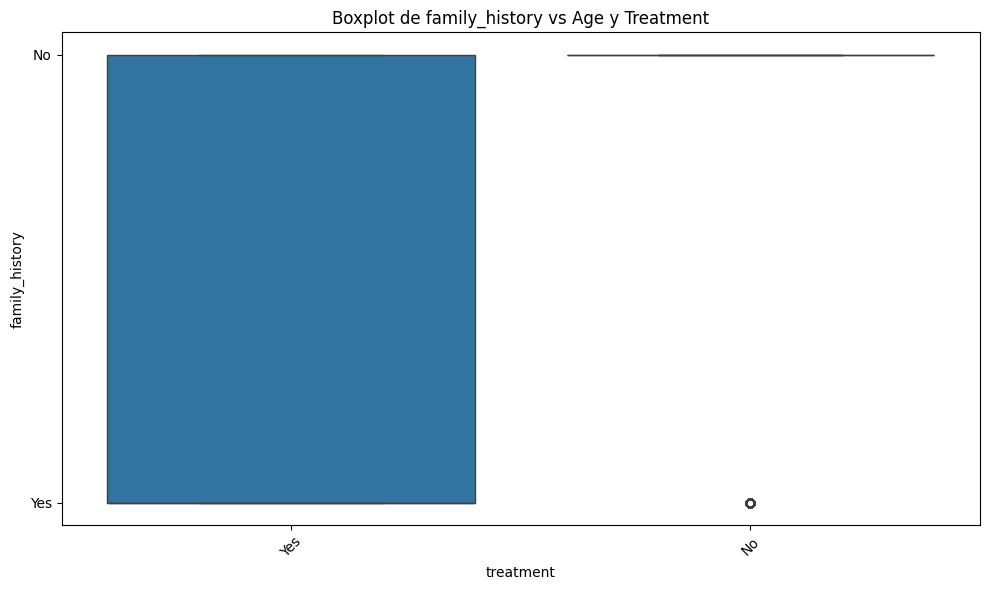

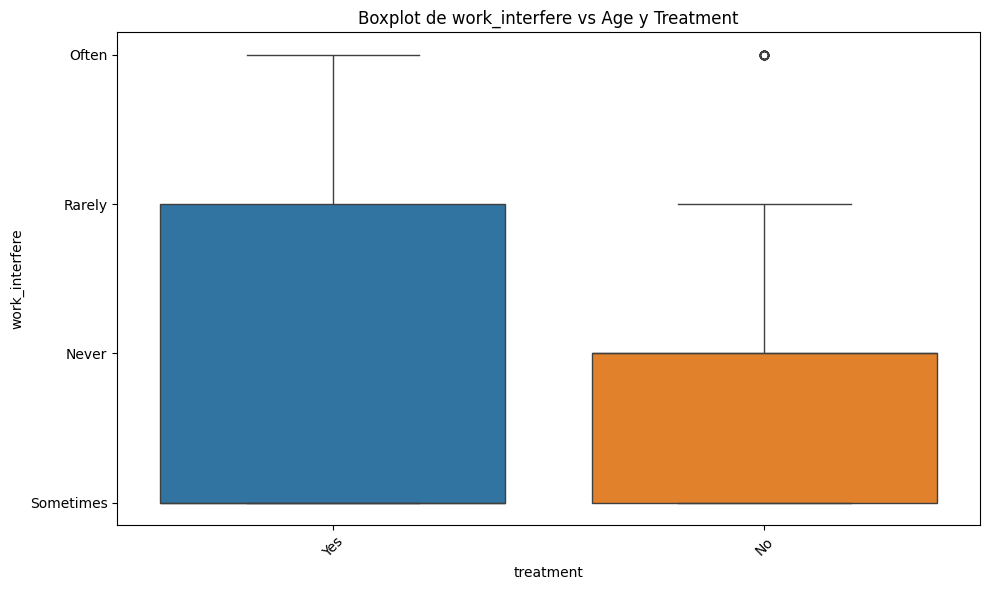

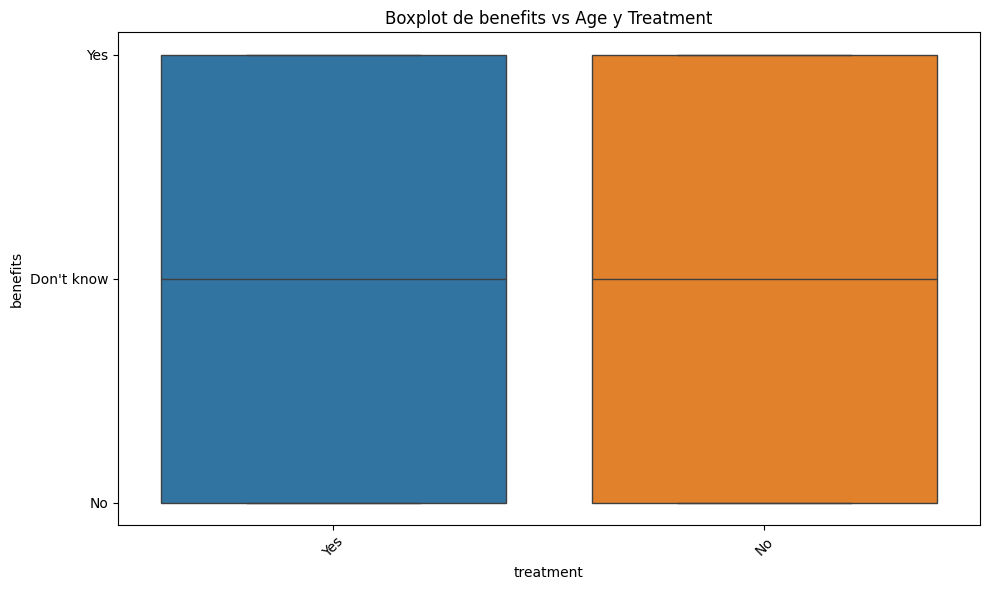

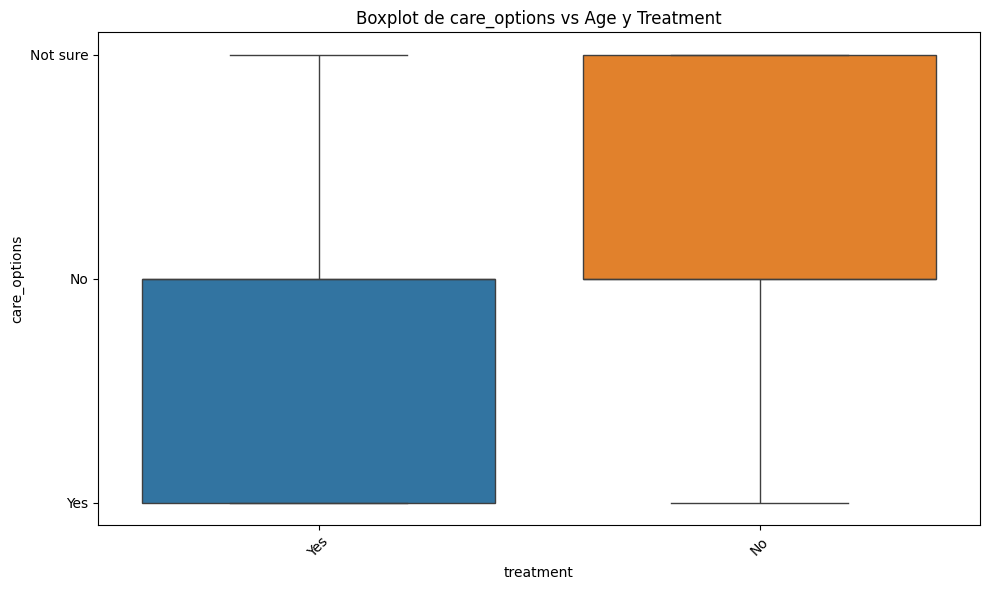

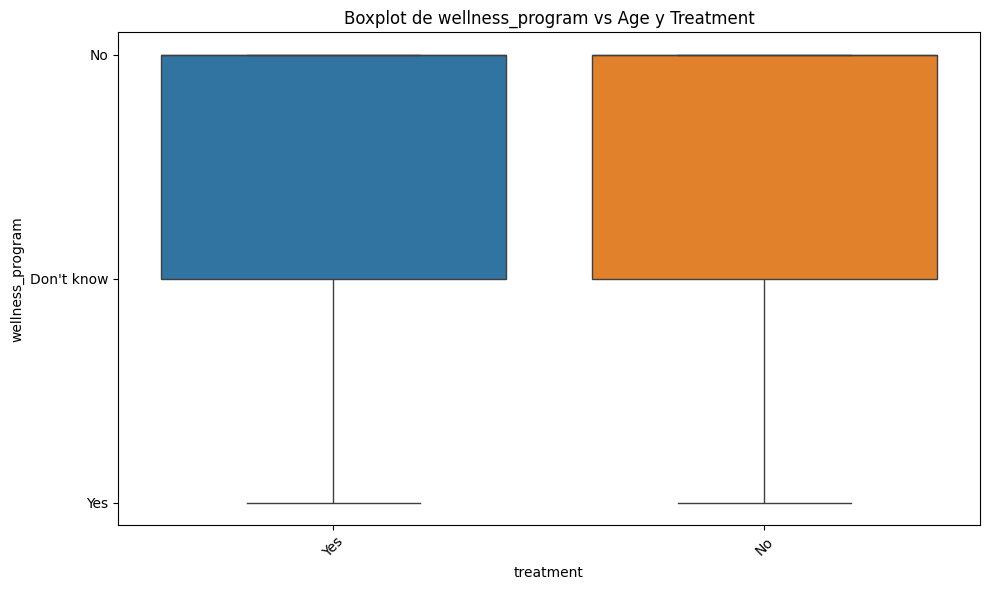

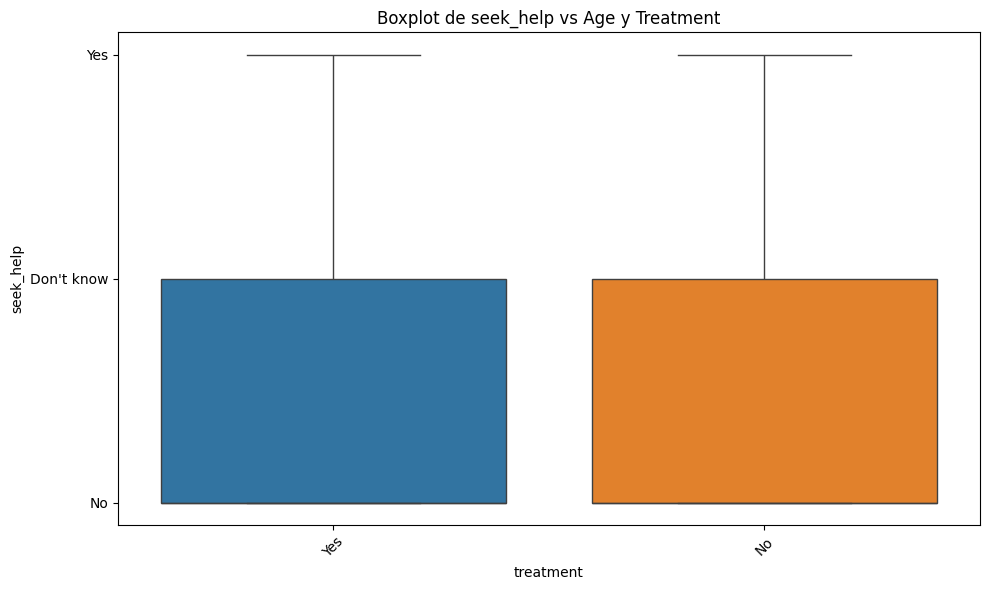

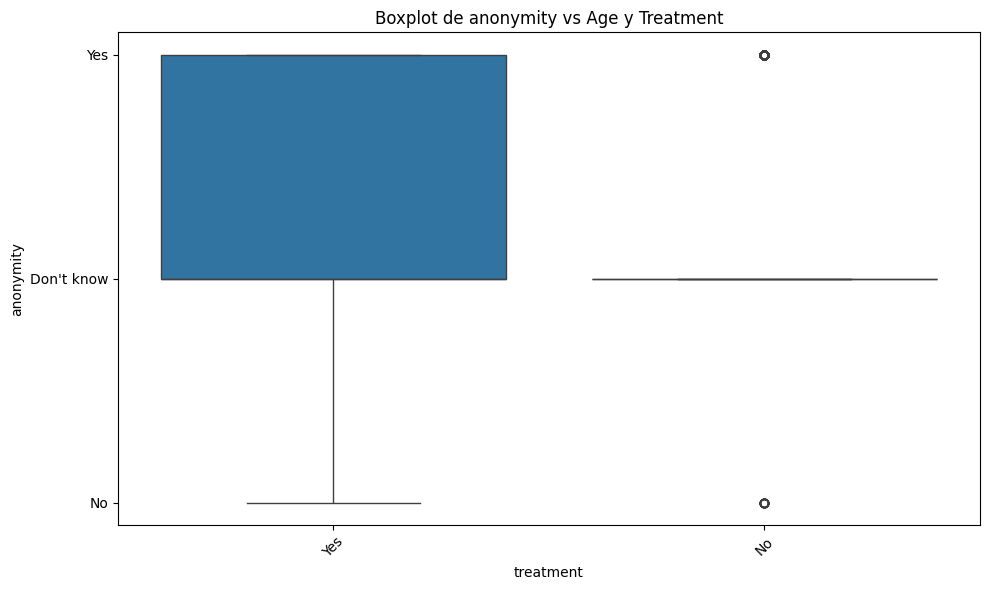

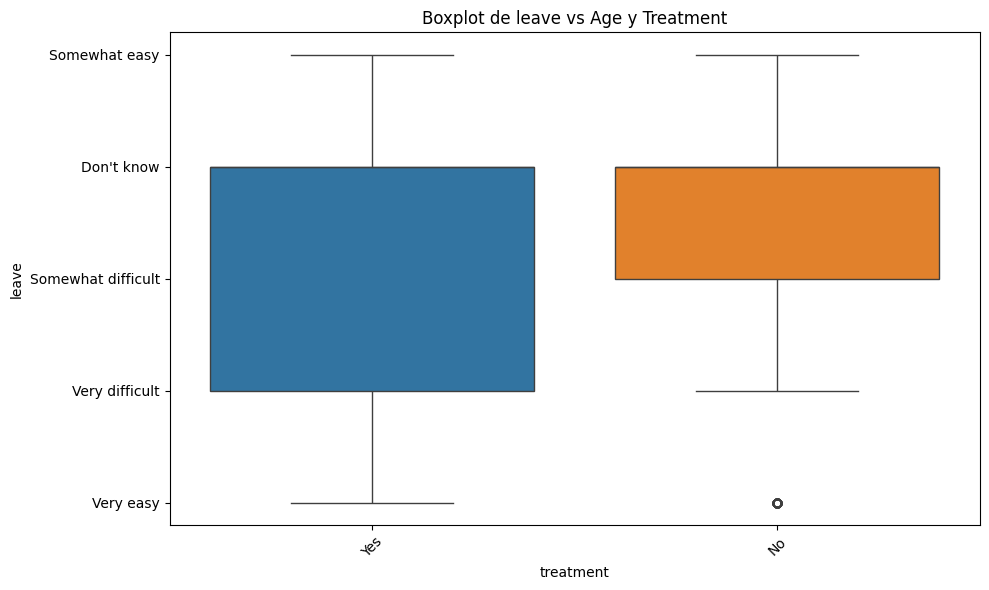

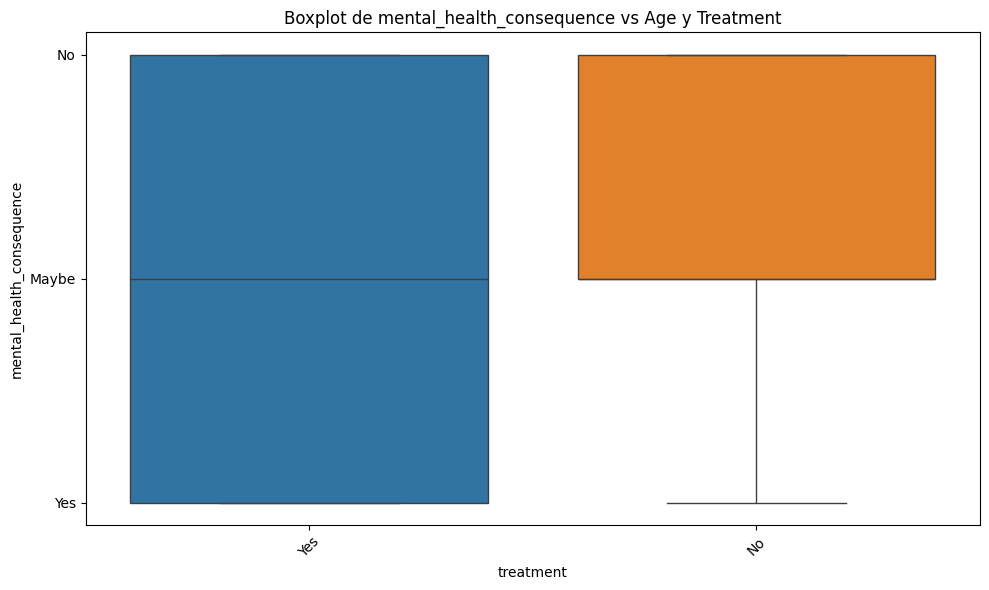

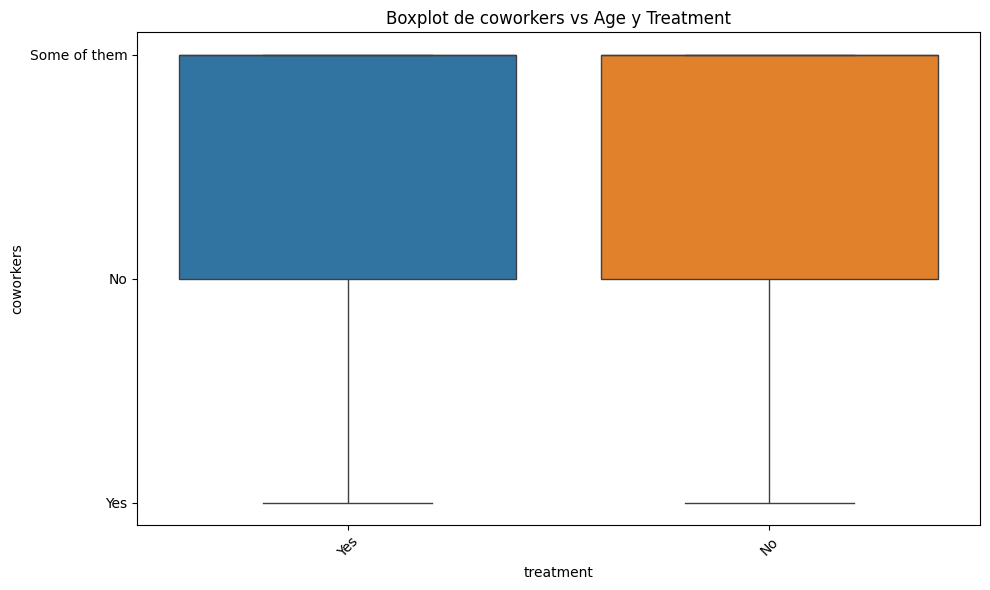

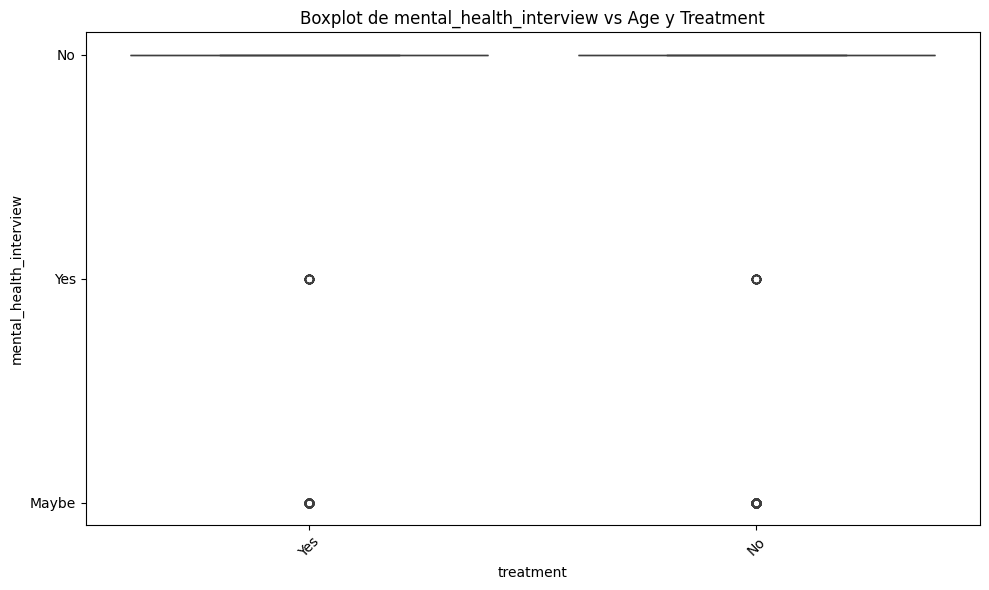

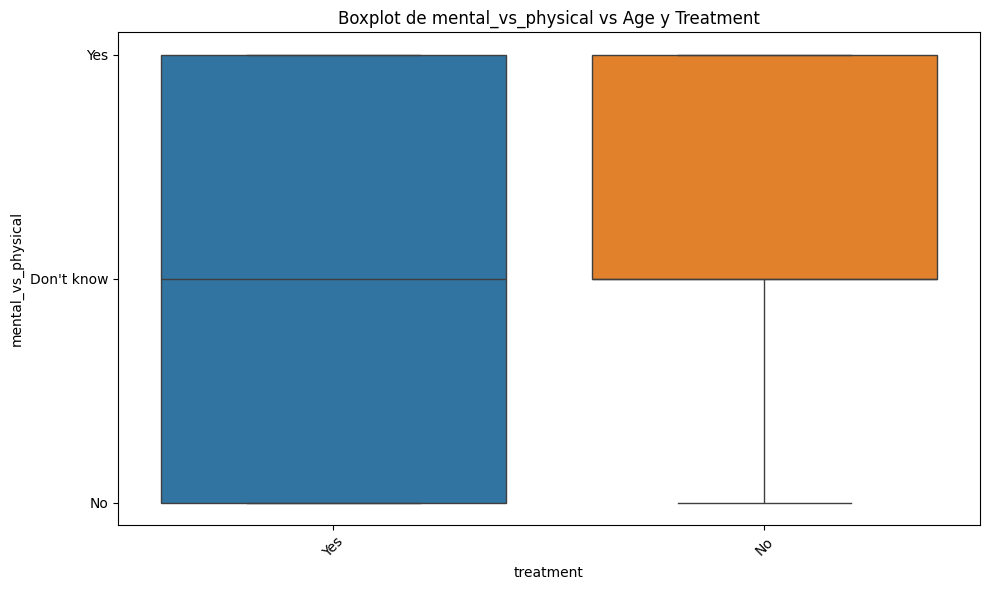

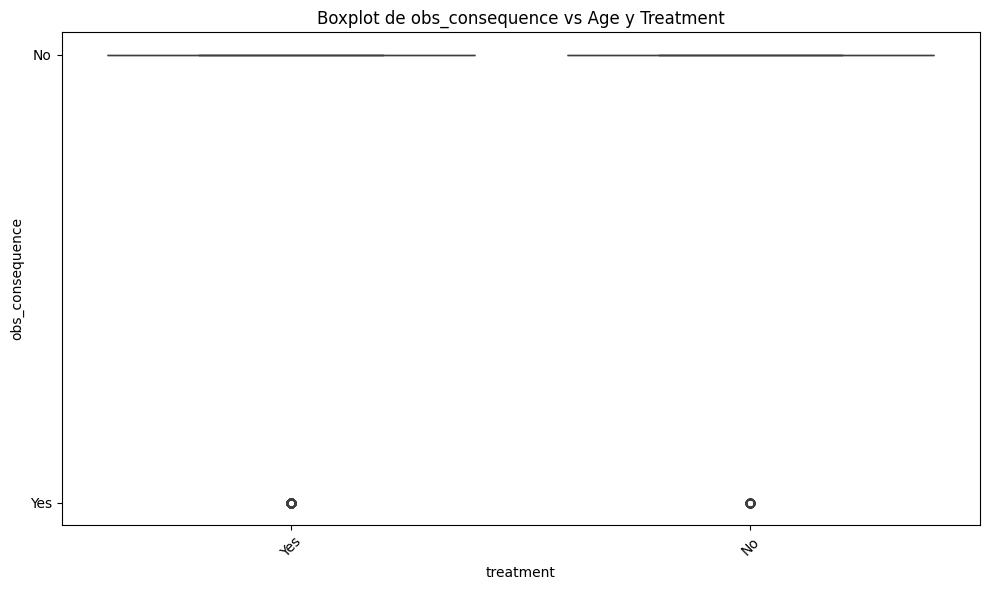

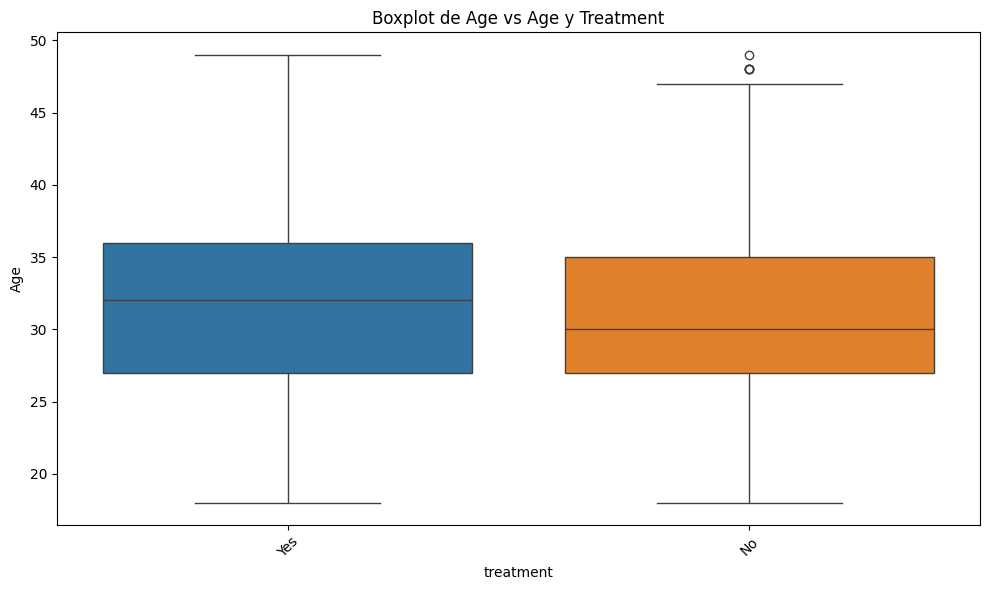

In [ ]:
variables_cualitativas = ['Gender', 'family_history', 'work_interfere', 'benefits', 'care_options',
                          'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                          'coworkers', 'mental_health_interview', 'mental_vs_physical', 'obs_consequence', 'Age']

for variable in variables_cualitativas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="treatment", y=variable, hue='treatment', data=df_limpio)
    plt.title(f'Boxplot de {variable} vs Age y Treatment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Histograma**

In [ ]:
sns.histplot(df_limpio["Gender"], kde=True,bins=10)
plt.title("Histograma de Genero")
plt.xlabel("treatment")
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variables_histograma = ['family_history', 'work_interfere', 'benefits', 'care_options',
                          'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                          'coworkers', 'mental_health_interview', 'mental_vs_physical', 'obs_consequence', "Age"]

for variable in variables_histograma:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_limpio[variable], kde=True, bins=10)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

**Grafica de barra(Bar plot)**

Basandome en la prueba de chi cuadrado, las que considero que tienen mayor dependencia con mi variable objetivo (treatment) son:

work_interfere (Si padece alguna enfermedad mental, ¿cree que interfiere en su trabajo?):

* Chi-cuadrado: 294.837
* Valor p: 1.30e-63
* Grados de libertad: 3

family_history (¿Tiene antecedentes familiares de enfermedad mental?):

* Chi-cuadrado: 178.267
* Valor p: 1.16e-40
* Grados de libertad: 1

care_options (¿Conoce las opciones de atención a la salud mental que ofrece su empresa?):

* Chi-cuadrado: 94.759
* Valor p: 2.65e-21
* Grados de libertad: 2

Dichas variables son las que tienen el p-valor mas bajo por ende son las que tienen mayor relación.

In [ ]:
variables_bar = ['family_history', 'work_interfere', 'care_options',]

for var in variables_bar:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='treatment', data=df_limpio)
    plt.title(f"Distribución de {var} con respecto al tratamiento")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**HeatMap**

In [ ]:
tabla_contingenica4_por = pd.crosstab(df_limpio["treatment"], df_limpio["family_history"], normalize="index")
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingenica4_por, annot=True, cmap="coolwarm")
plt.title("family_history")
plt.show()

Aqui me esta diciendo la grafica que hay una gran relacion entre las personas que dijeron que no tenian familiares con antecedentes mentales y las personas que nunca se habian hecho un chequeo o tratamiento mental.

Dandonos a entender que las personas que NO tienen familiares con dichos antecedentes, no se preocupan por hacerse un examen en el apartado de la salud mental.

In [ ]:
tabla_contingenica4_por = pd.crosstab(df_limpio["treatment"], df_limpio['work_interfere'], normalize="index")
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingenica4_por, annot=True, cmap="coolwarm")
plt.title("work_interfere")
plt.show()

Aquí se observa una relación significativa entre los problemas de salud mental y la eficiencia laboral. En la mayoría de los casos, las personas experimentan interferencias en su desempeño en el trabajo como resultado de hacerse algun tipo de revisión.

Nota: Puede deberse a que las personas que tienden a hacerse algun tipo de revision en el apartado de salud mental, han detectado problemas en su vida cotidiana.

In [ ]:
tabla_contingenica4_por = pd.crosstab(df_limpio["treatment"], df_limpio['care_options'], normalize="index")
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingenica4_por, annot=True, cmap="coolwarm")
plt.title("care_options")
plt.show()

En este caso el analisis es bastante curioso, debido a que hay un igual porcentaje para las personas que conocen opciones de ayuda en el apartado de salud mental en la empresa, y las que no, dando como resultado que casi el 50% de las personas que trabajan en esa empresa no se han hecho algun chequeo en el apartado de salud mental y a su vez no conocen las opciones de ayuda en su empresa.

**Grafica de dispersion**


In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_limpio, x="family_history", y="Age", hue="treatment")

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_limpio, x="care_options", y="Age", hue="treatment")

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_limpio, x="work_interfere", y="Age", hue="treatment")

**Diagrama de Bigotes**


In [ ]:
sns.boxplot(data=df_limpio, x="treatment", y="Age")

Aqui se puede notar que las personas que rondan en una edad entre los 27 y 35 años, son mas propensos a realizarse chequeos con respecto a su salud mental.

---

#**Conclusión**

A través del análisis de los datos sobre la salud mental en el trabajo, se ha evidenciado la importancia de abordar esta problemática desde una perspectiva integral. Los resultados obtenidos de las pruebas de Chi-cuadrado y las visualizaciones sugieren que existen relaciones significativas entre varias variables categóricas y el acceso a tratamientos de salud mental. Este proyecto resalta la necesidad de que las organizaciones presten atención a la salud mental de sus empleados, promoviendo un entorno donde buscar ayuda sea visto como una fortaleza, no como una debilidad. La implementación de políticas basadas en estos hallazgos puede contribuir no solo a mejorar la calidad de vida de los empleados, sino también a optimizar el rendimiento y la cohesión en el lugar de trabajo.

---

Se entrenara un modelo de Machine Learning para que prediga la variable "Treatment" que dice si alguna persona dentro de ese entorno laboral se ha hecho alguna vez un chequeo con respecto a su salud mental o si ha tenido algun tratamiento. Y para predecir dicho resultado utilizaremos las siguientes variables categoricas:

*   "family_history" = ¿Tiene antecedentes familiares de enfermedad mental?

*   "care_options" = ¿Conoce las opciones de atención a la salud mental que ofrece su empresa?

Y utilizaremos una variable numerica:

*   "Age"





In [9]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset_modelo = df_limpio[["family_history", "care_options", "Age", "treatment"]]
dataset_modelo = dataset_modelo[dataset_modelo["care_options"].isin(["Yes", "No"])]

In [50]:
dataset_modelo.head(10)

,family_history,care_options,Age,treatment
1,No,No,44,No
2,No,No,32,No
3,Yes,Yes,31,Yes
4,No,No,31,No
6,Yes,No,35,Yes
7,No,Yes,39,No
8,Yes,Yes,42,Yes
9,No,No,23,No
10,No,No,31,Yes
12,Yes,Yes,42,Yes


In [51]:
from sklearn.preprocessing import LabelEncoder

Le1 = LabelEncoder()
Le2 = LabelEncoder()
Le3 = LabelEncoder()


dataset_modelo['care_options'] = Le1.fit_transform(dataset_modelo['care_options'])
dataset_modelo["family_history"] = Le2.fit_transform(dataset_modelo["family_history"])
dataset_modelo["treatment"] = Le3.fit_transform(dataset_modelo["treatment"])

In [52]:
print(dict(zip(Le1.classes_, Le1.transform(Le1.classes_))))
print(dict(zip(Le2.classes_, Le2.transform(Le2.classes_))))
print(dict(zip(Le3.classes_, Le3.transform(Le3.classes_))))

{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}


Care_options = {No: 0, Yes: 2, Not sure: 1}

family_history = {No: 0, Yes: 1}

Treatment = {No: 0, Yes: 1}

In [19]:
dataset_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1258
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   family_history  1219 non-null   int64
 1   care_options    1219 non-null   int64
 2   Age             1219 non-null   int64
 3   treatment       1219 non-null   int64
dtypes: int64(4)
memory usage: 47.6 KB


In [20]:
dataset_modelo['treatment'].value_counts()

,count
treatment,
1,614
0,605


In [53]:
xc= dataset_modelo[["Age", "family_history", "care_options"]]
yc= dataset_modelo['treatment']
train_size = np.linspace(0.1, 1.0, 10)

##Grid Search

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [55]:
modelo = LogisticRegression()

In [56]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring="accuracy")

grid_search.fit(xc, yc)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_modelo1 = grid_search.best_estimator_

Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.6951240016813787


In [31]:
best_model = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'liblinear')

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_model, xc, yc, train_sizes=train_size, cv=10,scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning curve - Logistic Regression")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="C1")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="C0")

plt.plot()
